### Import required libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and review dataset

In [77]:
df = pd.read_csv("Customer_Churn.csv")

In [78]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [80]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [81]:
#check descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


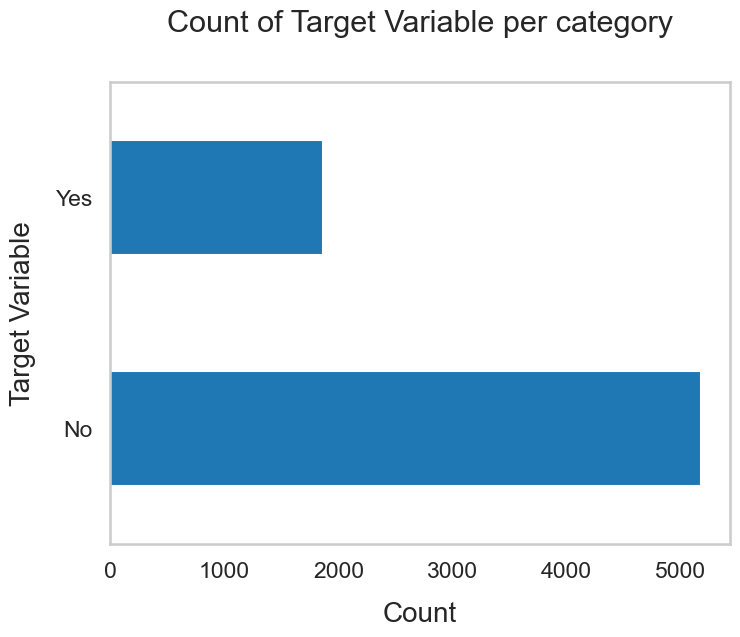

In [82]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.grid()
plt.title("Count of Target Variable per category", y=1.02);

In [83]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

    1. Data is highly imbalanced, ratio 73:27
    2. So we analyse the data with other features while taking the target values seprately to get some insights.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

Create a copy of base data for manupulation and processing

In [85]:
data = df.copy()

#### Total charges should be numeric amount. Let's convert it to numerical data type

In [86]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

    As we can see there are 11 missing values in TotalCharges column.

In [87]:
data.loc[data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Missing Value Treatment

Since the null data is very low so we ignore and drop them.

In [88]:
data.dropna(how = 'any', inplace = True)

#### Get the max tenure and group them in bins of 12 months

In [89]:
print(data['tenure'].max())

72


In [90]:
labels = ['{0} - {1}'.format(i, i+11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [91]:
data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

#### Remove columns that are not required

In [92]:
data.drop(columns=['customerID','tenure'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Data Exploration

plot distribution of individual predictors by churn

#### Univariate Analysis

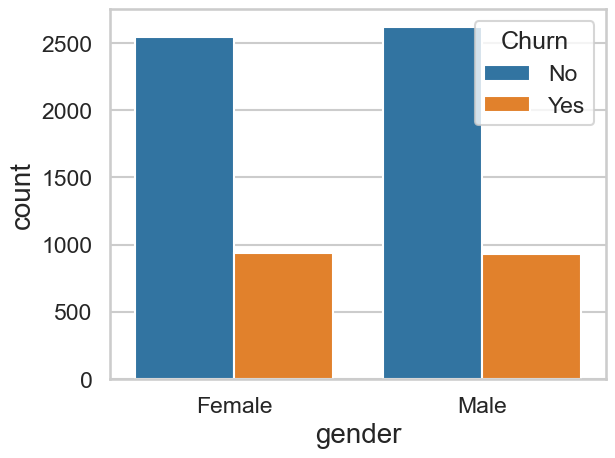

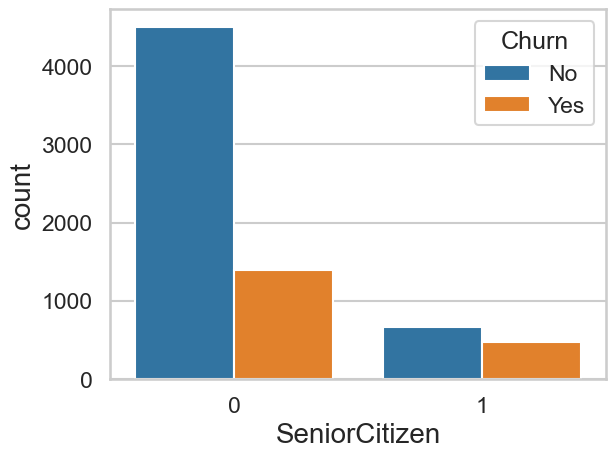

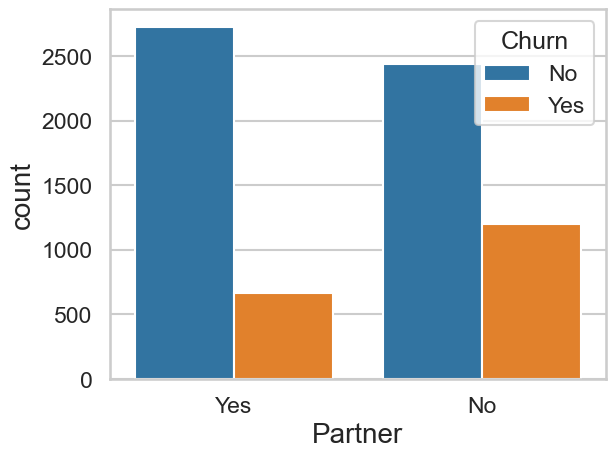

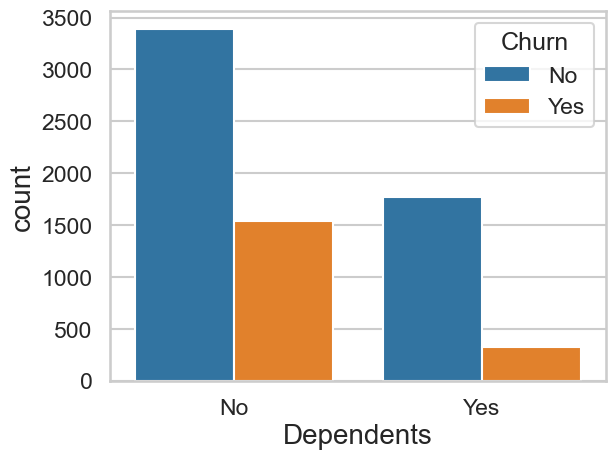

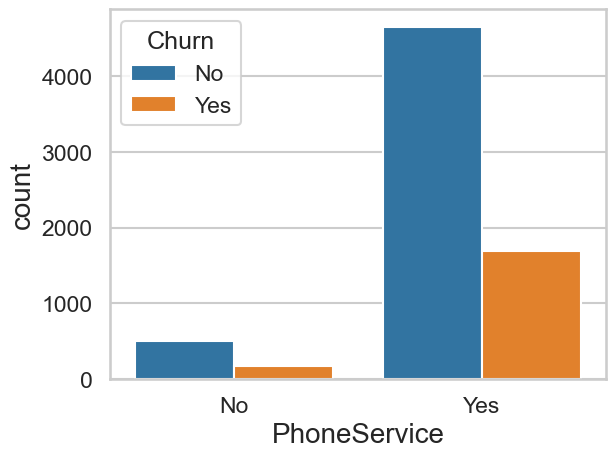

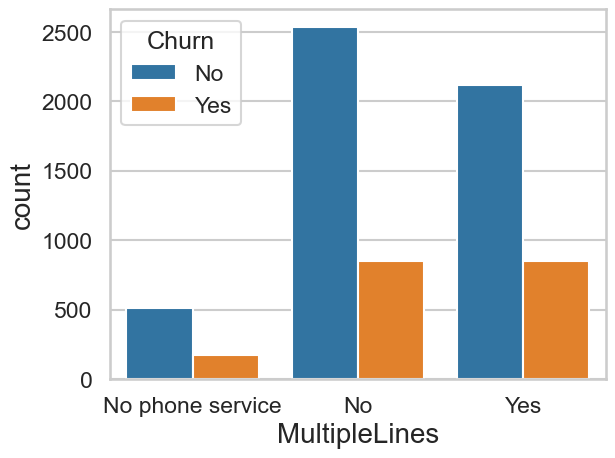

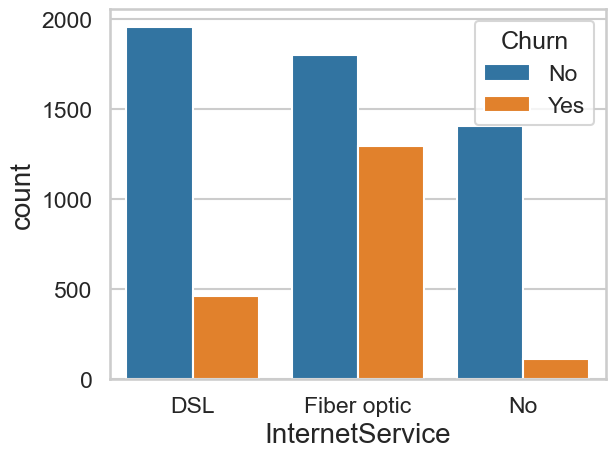

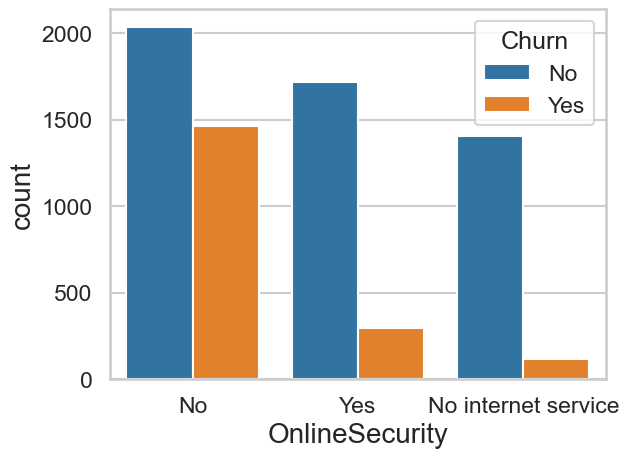

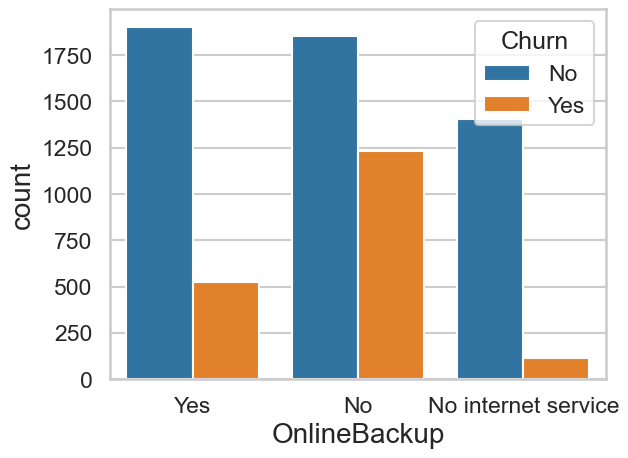

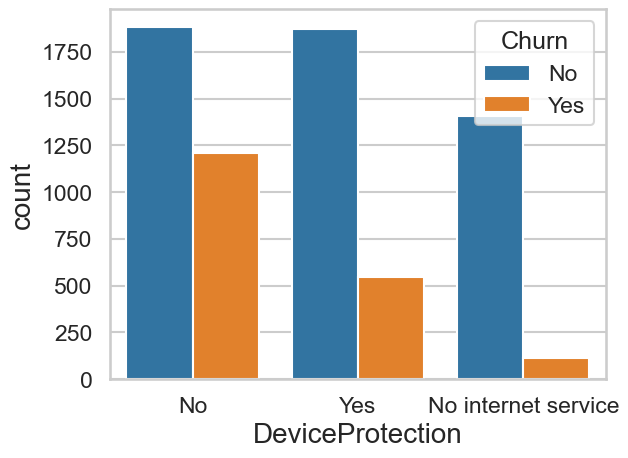

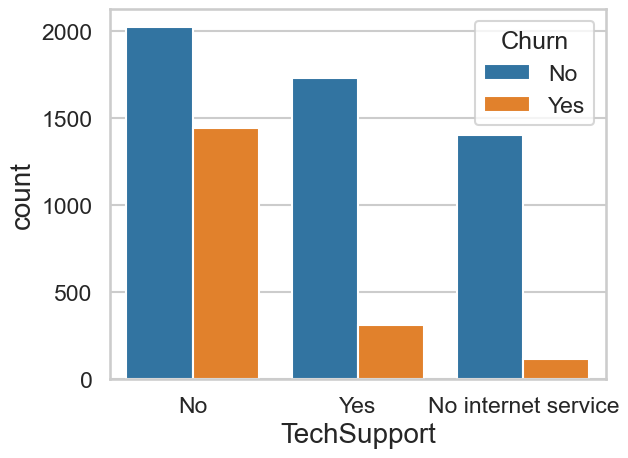

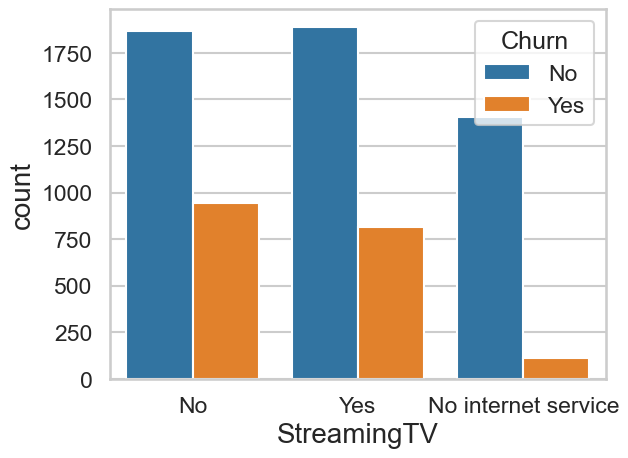

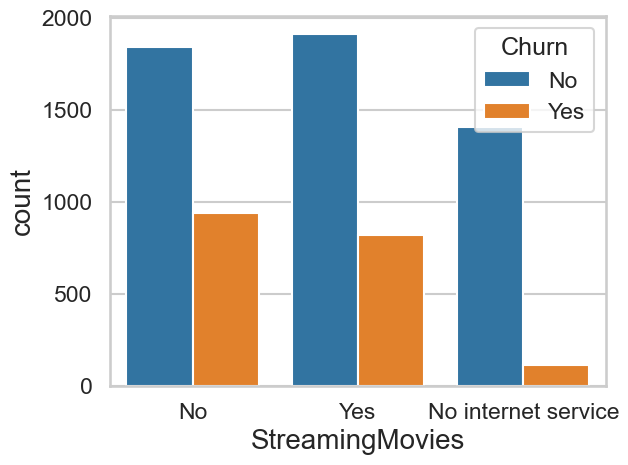

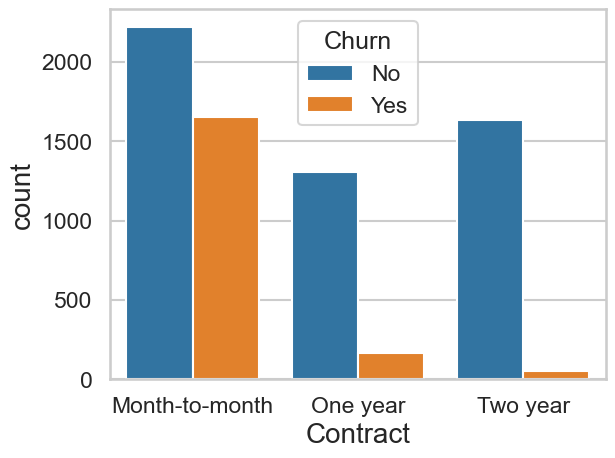

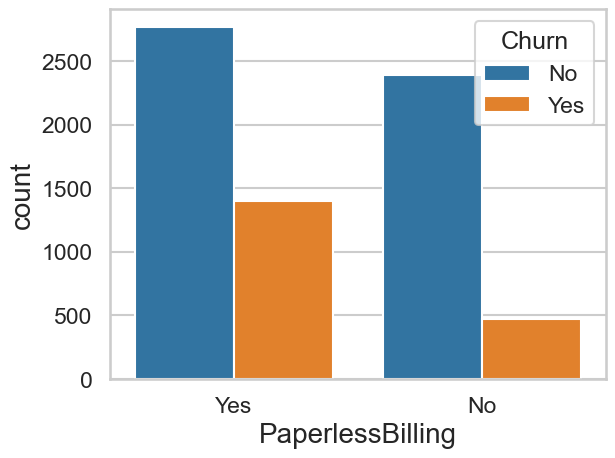

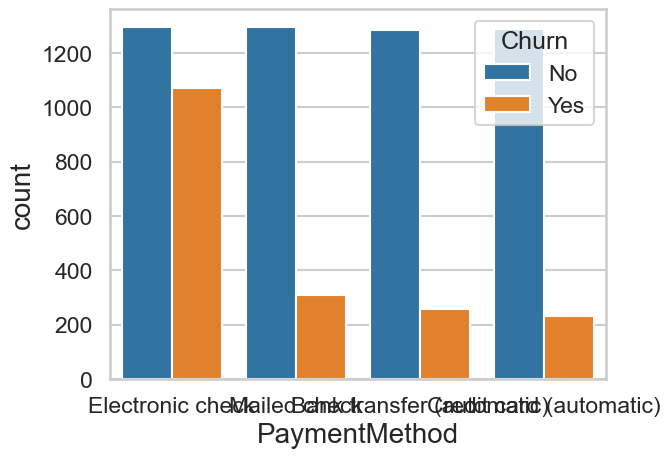

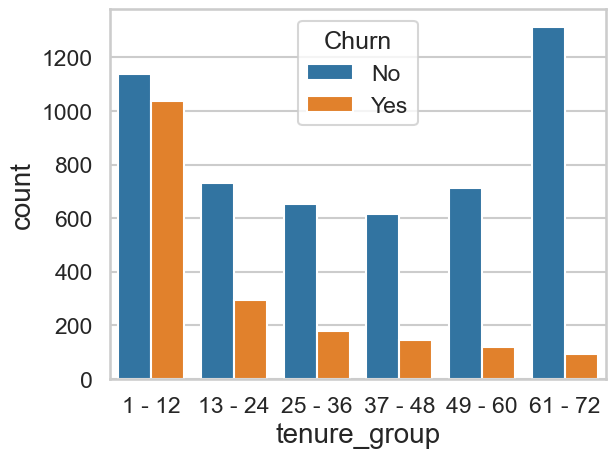

In [93]:
for i, predictor in enumerate(data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Churn')

    Convert the target variable Churn in a binary variable i.e. Yes = 1 ; No = 0

In [94]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)

In [95]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


#### Relationship between Monthly Charges and Total Charges

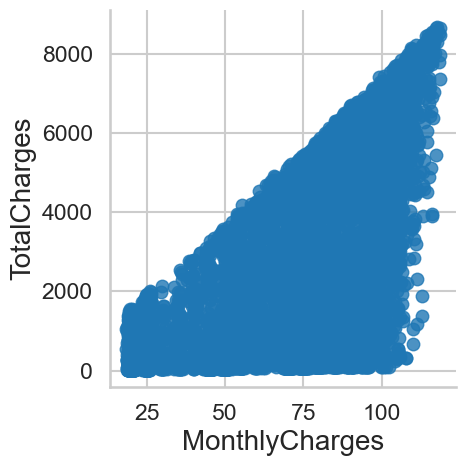

In [96]:
sns.lmplot(data=data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
plt.show()

    Total Charges increses as Monthly Charges increases - as expected.

#### Churn by Total Charges and Monthly Charges

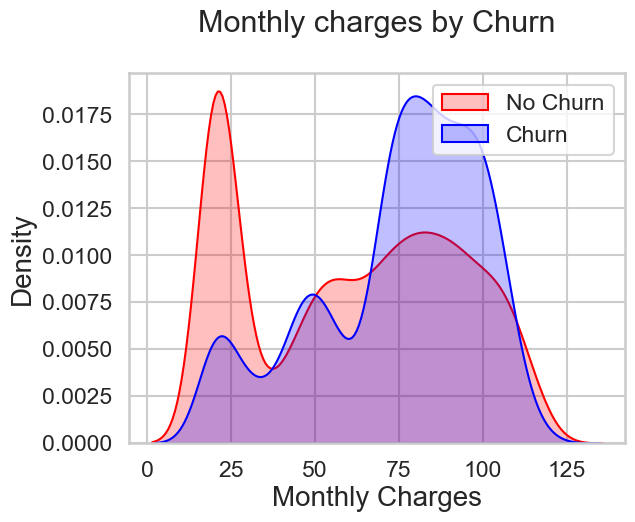

In [97]:
Mth = sns.kdeplot(data.MonthlyCharges[(data['Churn'] == 0)],
                 color='Red', shade=True)
Mth = sns.kdeplot(data.MonthlyCharges[(data['Churn'] == 1)],
                 color='Blue', shade=True)
Mth.legend(['No Churn','Churn'], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by Churn')
plt.show()

    Churn is high when Monthly Charges are High.

#### Convert all the categorical variables into dummy variables

In [98]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


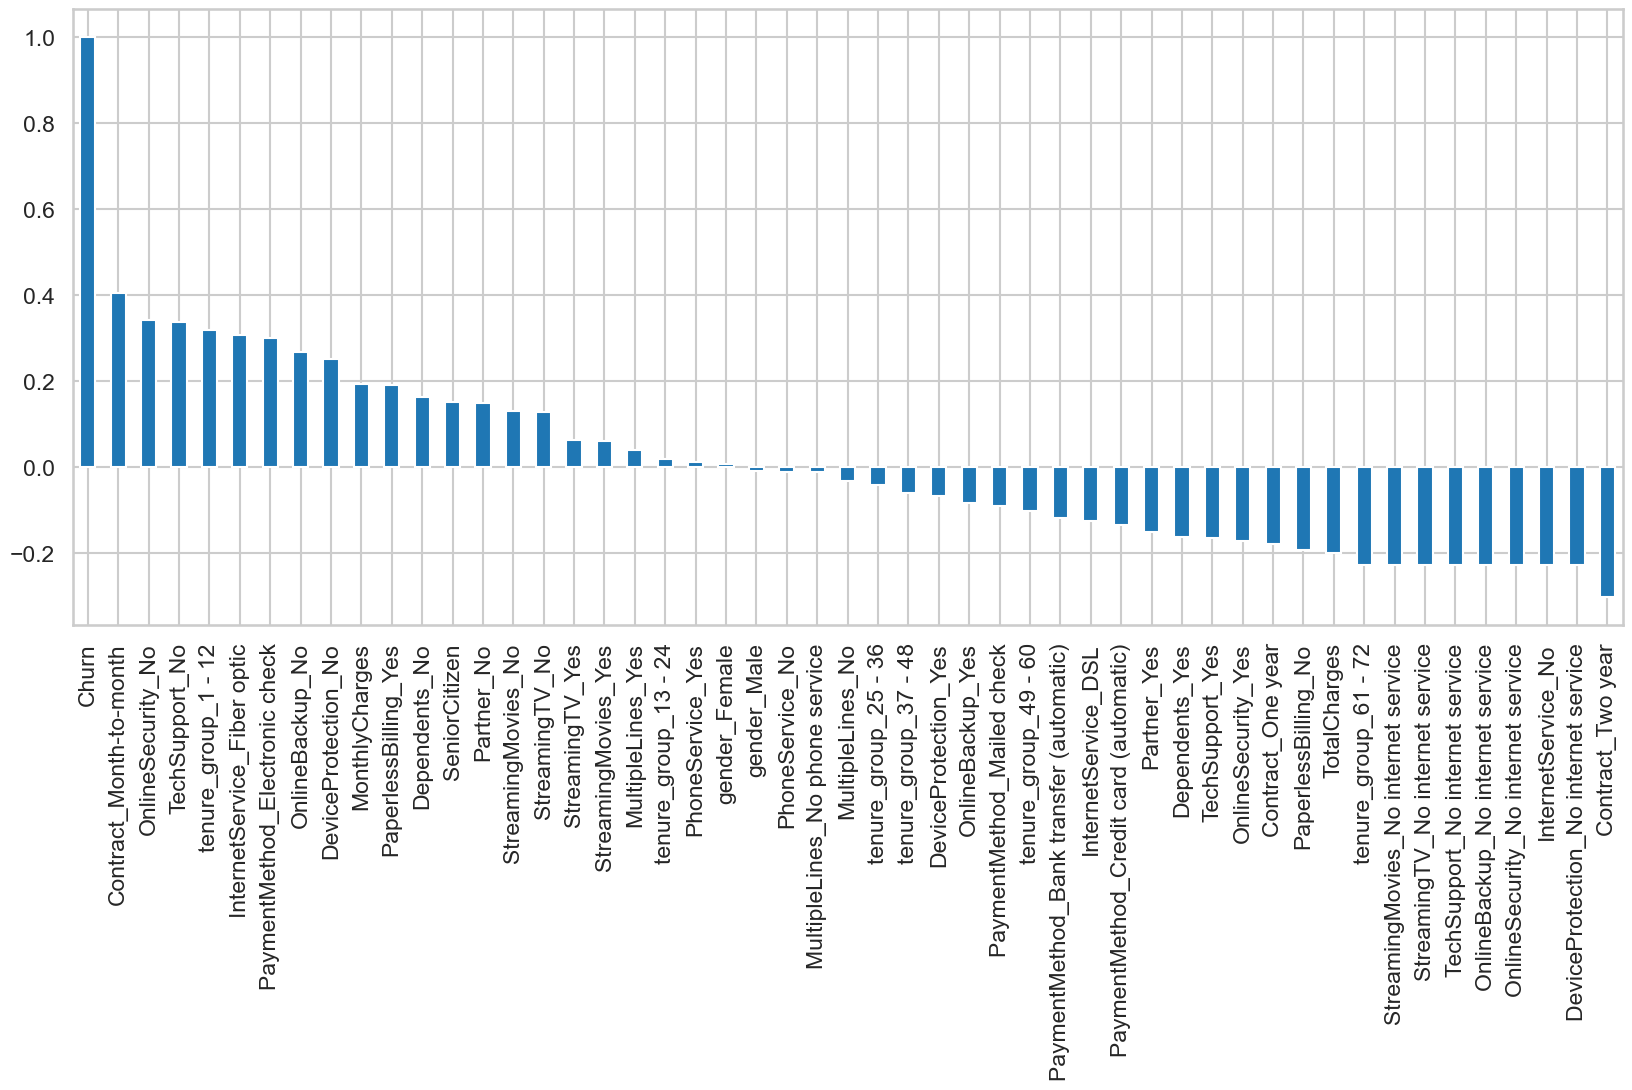

In [100]:
plt.figure(figsize=(20,8))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

Insight:-
1. High churn seen in case of month to month contracts. No Tech support. First year of subscription and fiber optics internet.
2. Low churn is seen in case of Long term contracts. Subscription without internet service and The customers engaged for 5+ years 
3. Factors like Gender, Availability of phone service have almost No impact on Churn.

<AxesSubplot:>

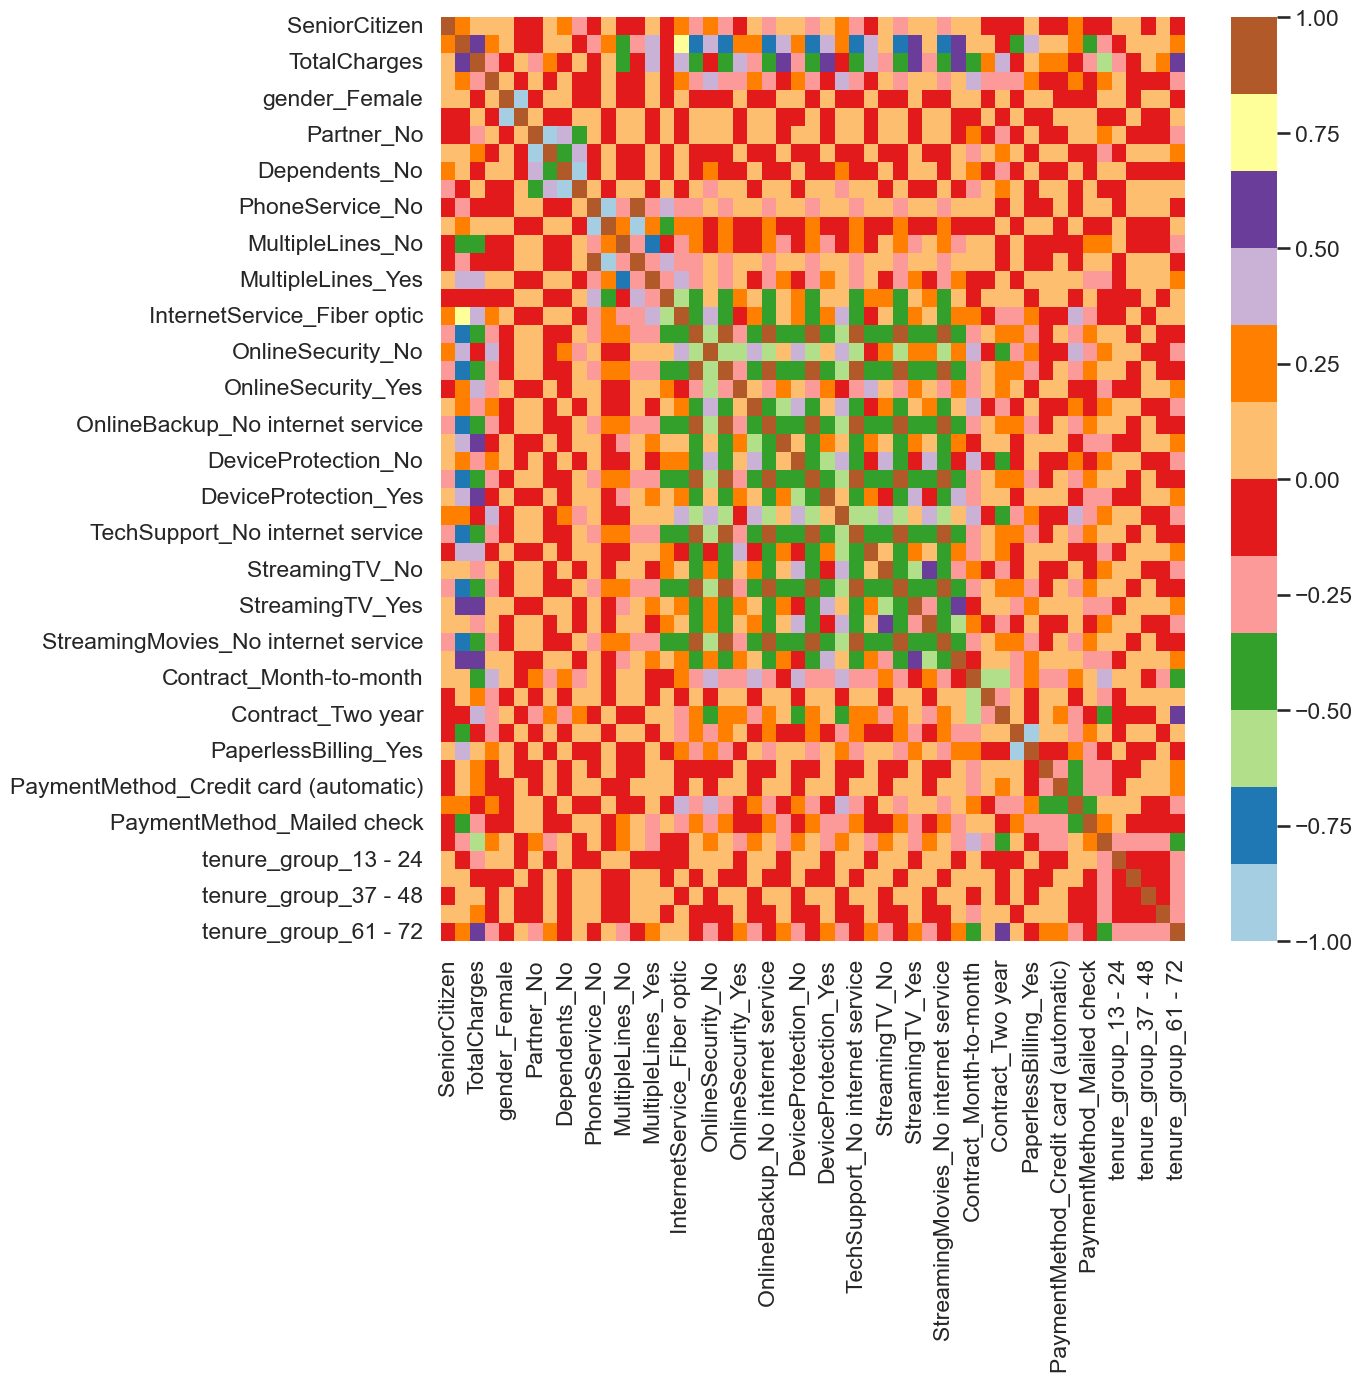

In [101]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap='Paired')

### Bivariate Analysis

In [102]:
data_target0=data.loc[data['Churn']==0]
data_target1=data.loc[data['Churn']==1]

In [103]:
def uniplot(df, col,title,hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp=pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x=col, order=df[col].value_counts().index, hue = hue, palette='bright')
    
    plt.show()

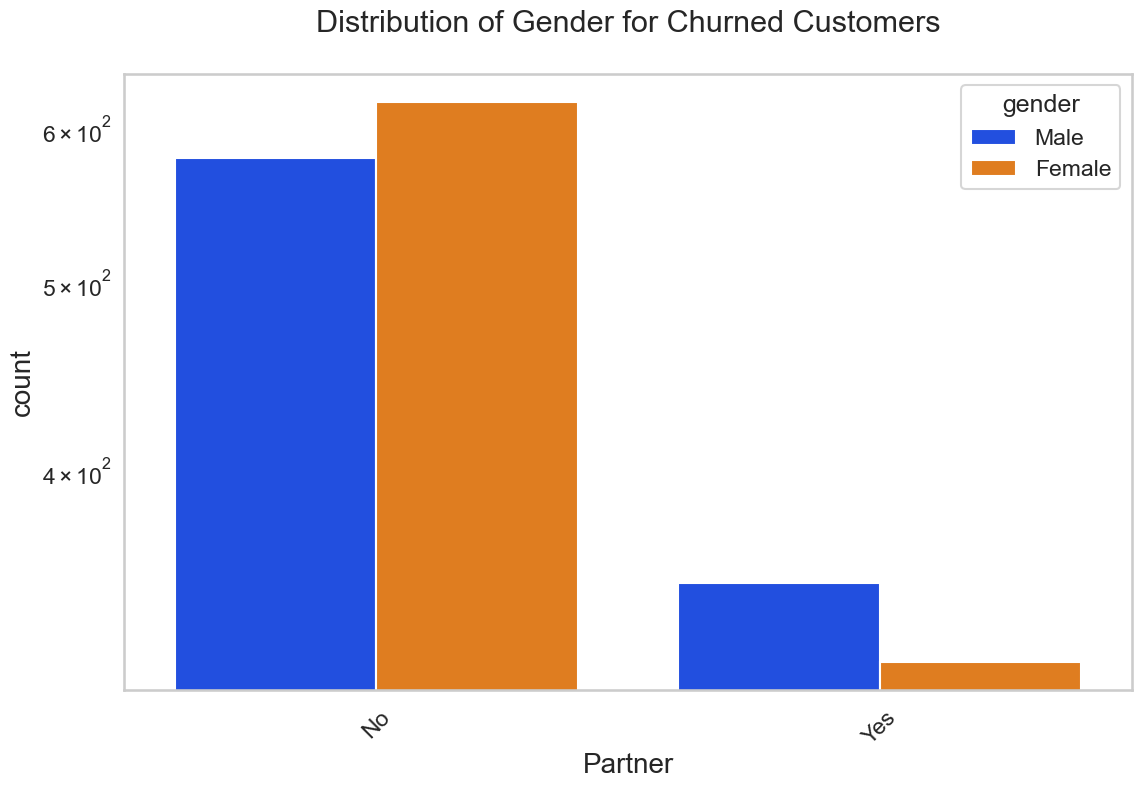

In [104]:
uniplot(data_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

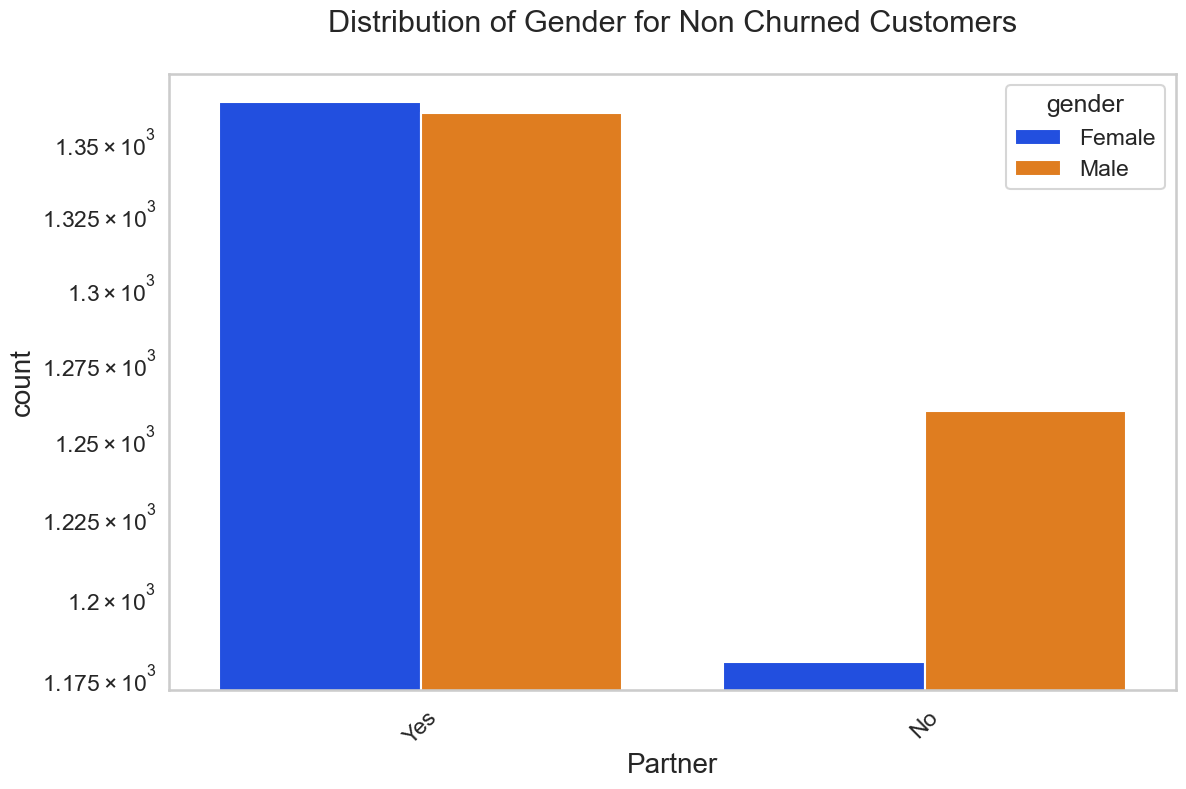

In [105]:
uniplot(data_target0, col='Partner', title='Distribution of Gender for Non Churned Customers', hue='gender')

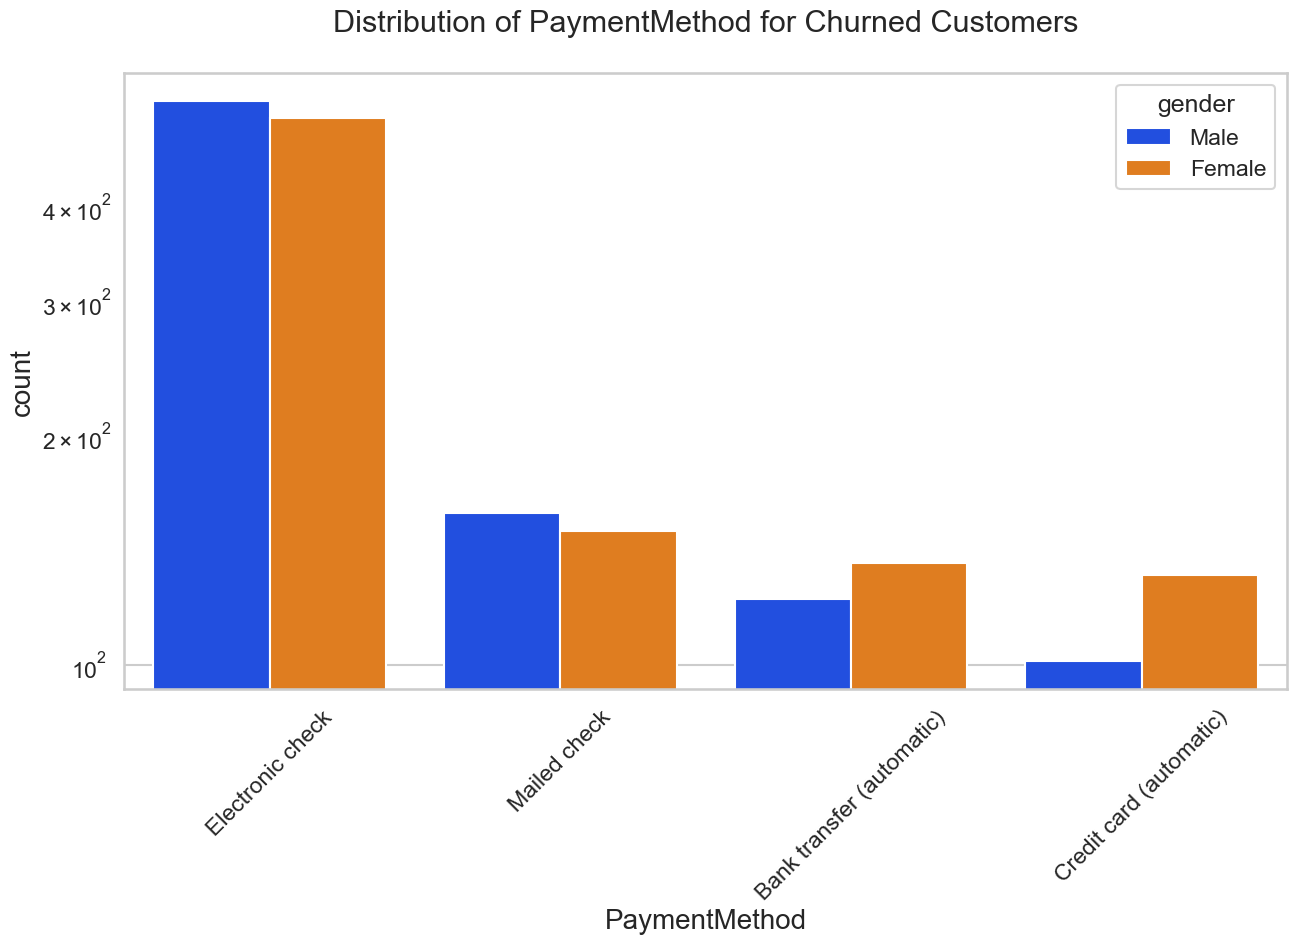

In [106]:
uniplot(data_target1, col='PaymentMethod', title='Distribution of PaymentMethod for Churned Customers', hue='gender')

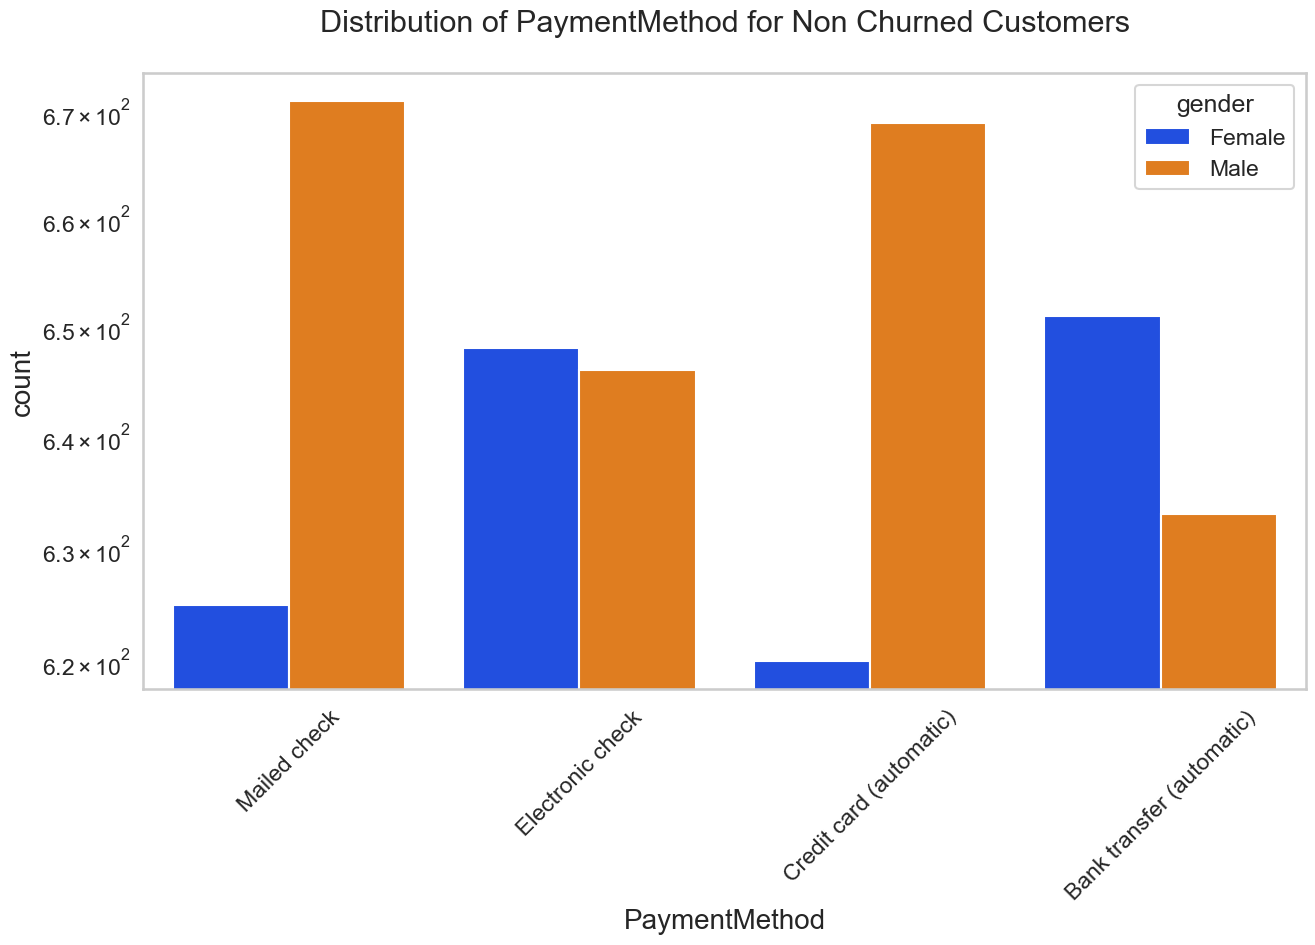

In [107]:
uniplot(data_target0, col='PaymentMethod', title='Distribution of PaymentMethod for Non Churned Customers', hue='gender')

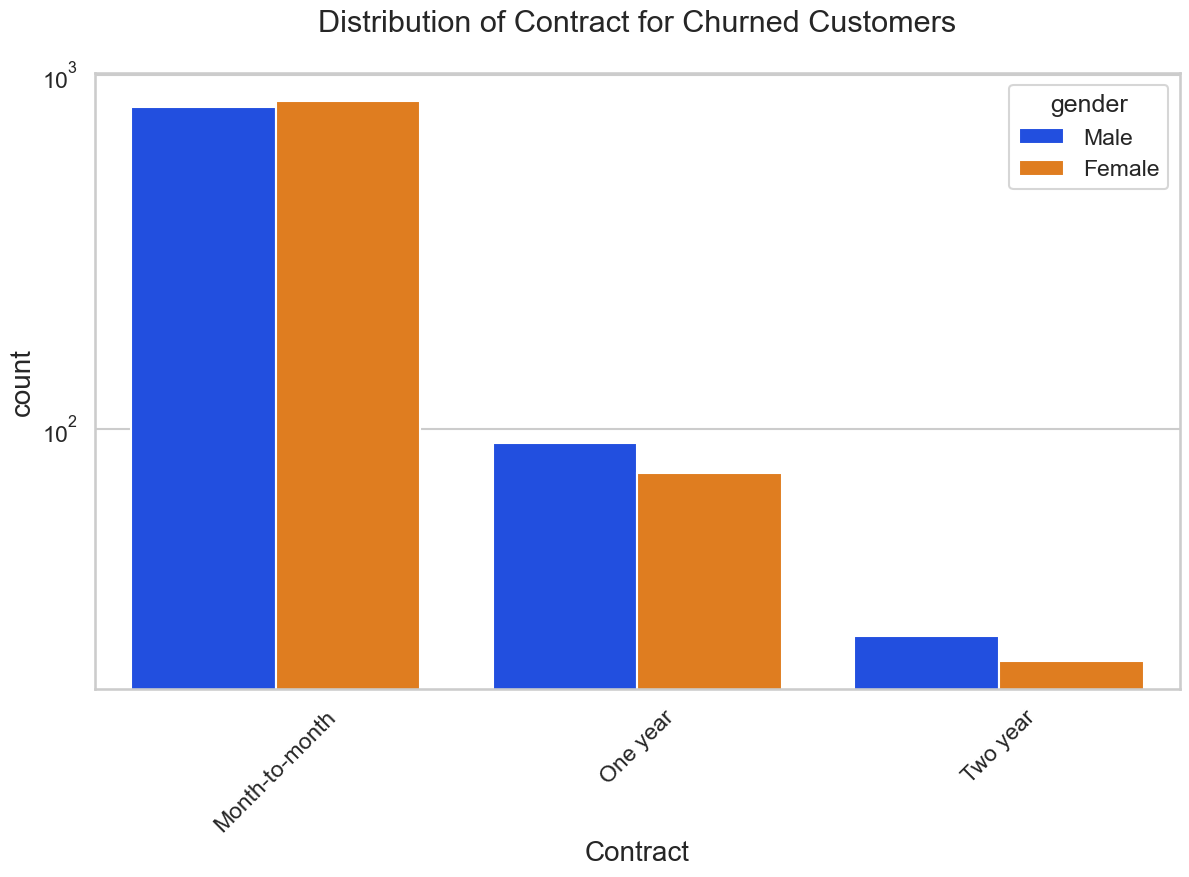

In [108]:
uniplot(data_target1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')

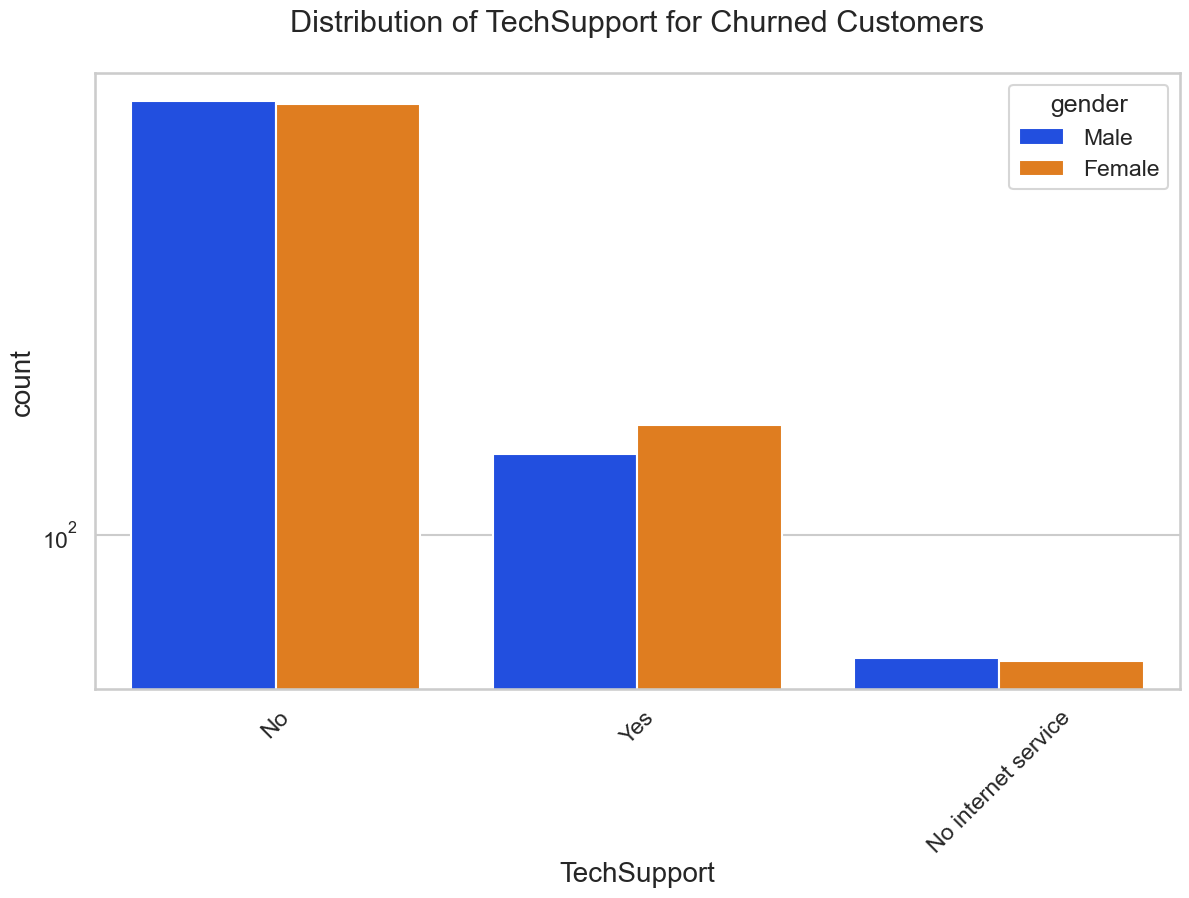

In [109]:
uniplot(data_target1, col='TechSupport', title='Distribution of TechSupport for Churned Customers', hue='gender')

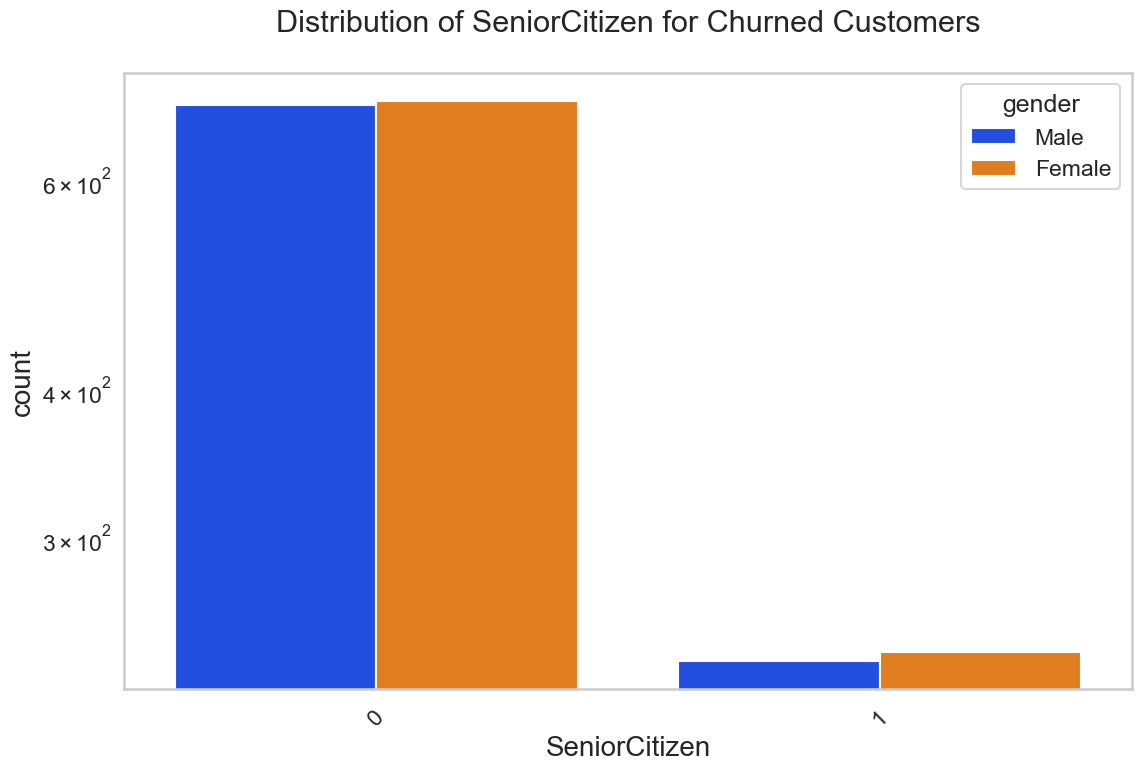

In [110]:
uniplot(data_target1, col='SeniorCitizen', title='Distribution of SeniorCitizen for Churned Customers', hue='gender')

#### CONCLUSION

These are some of the quick insights from this exercise:
1. Electronic check medium are the highest churners.
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online Security, No Tech Support category are high churners.
4. Non Senior Citizens are high Churners.

### Data Pre-Processing

In [111]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


### Analysisng unique value counts for each columns

In [112]:
columns = data.columns
columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [113]:
for column in data.columns:
    print(data[column].value_counts())
    print(("*"*20))

Male      3549
Female    3483
Name: gender, dtype: int64
********************
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
********************
No     3639
Yes    3393
Name: Partner, dtype: int64
********************
No     4933
Yes    2099
Name: Dependents, dtype: int64
********************
Yes    6352
No      680
Name: PhoneService, dtype: int64
********************
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
********************
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
********************
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
********************
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
********************
No                     3094
Yes                    2418
No internet service    1520
Name: Devic

#### Encoding the categorical features

In [114]:
data.replace({'gender':{'Male':0, 'Female':1}}, inplace=True)
data.replace({'Partner':{'No':0, 'Yes':1}}, inplace=True)
data.replace({'Dependents':{'No':0, 'Yes':1}}, inplace=True)
data.replace({'PhoneService':{'No':0, 'Yes':1}}, inplace=True)
data.replace({'MultipleLines':{'No':0, 'Yes':1, 'No phone service':2}}, inplace=True)
data.replace({'InternetService':{'No':0, 'Fiber optic':1, 'DSL':2}}, inplace=True)
data.replace({'OnlineSecurity':{'No':0, 'Yes':1, 'No internet service':2}}, inplace=True)
data.replace({'OnlineBackup':{'No':0, 'Yes':1, 'No internet service':2}}, inplace=True)
data.replace({'DeviceProtection':{'No':0, 'Yes':1, 'No internet service':2}}, inplace=True)
data.replace({'TechSupport':{'No':0, 'Yes':1, 'No internet service':2}}, inplace=True)
data.replace({'StreamingTV':{'No':0, 'Yes':1, 'No internet service':2}}, inplace=True)
data.replace({'StreamingMovies':{'No':0, 'Yes':1, 'No internet service':2}}, inplace=True)
data.replace({'Contract':{'Month-to-month':0, 'Two year':1, 'One year':2}}, inplace=True)
data.replace({'PaperlessBilling':{'No':0, 'Yes':1}}, inplace=True)
data.replace({'PaymentMethod':{'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3}}, inplace=True)
data.replace({'tenure_group':{'1 - 12':0, '13 - 24':1,'25 - 36':2, '37 - 48':3,'49 - 60':4, '61 - 72':5}}, inplace=True)

In [115]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,1,0,1,0,0,2,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0,0
1,0,0,0,0,1,0,2,1,0,1,0,0,0,2,0,1,56.95,1889.50,0,2
2,0,0,0,0,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,1,0
3,0,0,0,0,0,2,2,1,0,1,1,0,0,2,0,2,42.30,1840.75,0,3
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1,0


### Model Building

In [116]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [117]:
x = data.drop('Churn', axis=1)
x.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,1,0,1,0,0,2,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,1,0,2,1,0,1,0,0,0,2,0,1,56.95,1889.50,2
2,0,0,0,0,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,0
3,0,0,0,0,0,2,2,1,0,1,1,0,0,2,0,2,42.30,1840.75,3
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,0


In [118]:
y = data_dummies['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

### Decision Tree Classifier

In [120]:
model_dt = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)

In [121]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
model_dt.score(x_test, y_pred)

1.0

In [123]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1011
           1       0.67      0.51      0.58       396

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



### Random Forest Classifier

In [124]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

In [125]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1011
           1       0.72      0.49      0.59       396

    accuracy                           0.80      1407
   macro avg       0.77      0.71      0.73      1407
weighted avg       0.80      0.80      0.79      1407



### Save the Model

In [126]:
import pickle

In [127]:
filename = 'model.sav'

In [128]:
pickle.dump(model_rf, open(filename, 'wb'))

In [129]:
load_model = pickle.load(open(filename, 'rb'))

In [130]:
load_model.score(x_test,y_test)

0.8045486851457001